In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
raw_data=pd.read_csv('Popular_Spotify_Songs.csv',encoding="unicode_escape")

In [4]:
raw_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
raw_data.shape

(953, 24)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [7]:
spotify=raw_data[['track_name','artist(s)_name','released_year','in_apple_charts','in_deezer_charts','in_shazam_charts']]

In [8]:
spotify.nunique()

track_name          943
artist(s)_name      645
released_year        50
in_apple_charts     172
in_deezer_charts     34
in_shazam_charts    198
dtype: int64

In [11]:
most_famous_songs_in_apple_chart=spotify[spotify['in_apple_charts']==0]
most_famous_songs_in_apple_chart

,track_name,artist(s)_name,released_year,in_apple_charts,in_deezer_charts,in_shazam_charts
29,Dance The Night (From Barbie The Album),Dua Lipa,2023,0,38,0
53,(It Goes Like) Nanana - Edit,Peggy Gou,2023,0,17,0
62,Left and Right (Feat. Jung Kook of BTS),"Charlie Puth, BTS, Jung Kook",2022,0,0,0
75,Viva La Vida,Coldplay,2008,0,9,0
138,Perfect,Ed Sheeran,2017,0,0,0
...,...,...,...,...,...,...
924,2 Be Loved (Am I Ready),Lizzo,2022,0,2,68
927,I Really Want to Stay at Your House,"Rosa Walton, Hallie Coggins",2020,0,0,NaN
930,Casei Com a Putaria,"MC Ryan SP, Love Funk, Mc Paiva ZS",2022,0,0,0
949,Bigger Than The Whole Sky,Taylor Swift,2022,0,0,0


In [12]:
most_famous_songs_in_apple_chart.nunique()

track_name          100
artist(s)_name       84
released_year        24
in_apple_charts       1
in_deezer_charts     10
in_shazam_charts     10
dtype: int64

In [15]:
top_10_singers_apple=most_famous_songs_in_apple_chart['artist(s)_name'].value_counts().head(10)
top_10_singers_apple

artist(s)_name
Kendrick Lamar                 7
Bruno Mars                     4
Michael Bublï¿                 2
Linkin Park                    2
Coldplay                       2
Ed Sheeran                     2
Jack Harlow                    2
Paulo Londra                   2
Lizzo                          2
Kendrick Lamar, Tanna Leone    1
Name: count, dtype: int64

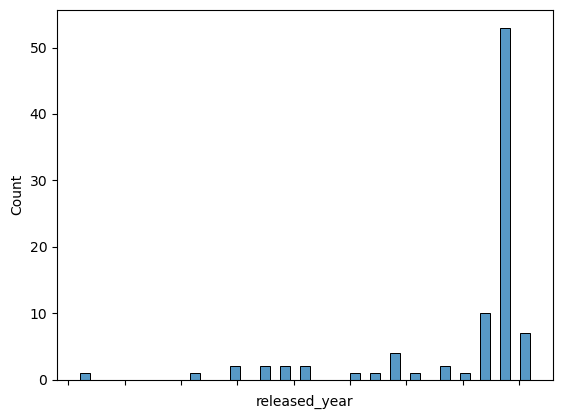

In [26]:
data=most_famous_songs_in_apple_chart[most_famous_songs_in_apple_chart['released_year']>2000]
fig,ax=plt.subplots()
g=sns.histplot(
    data=data,
    x='released_year',
    ax=ax
)
ax.set_xticklabels([])
plt.show(g)


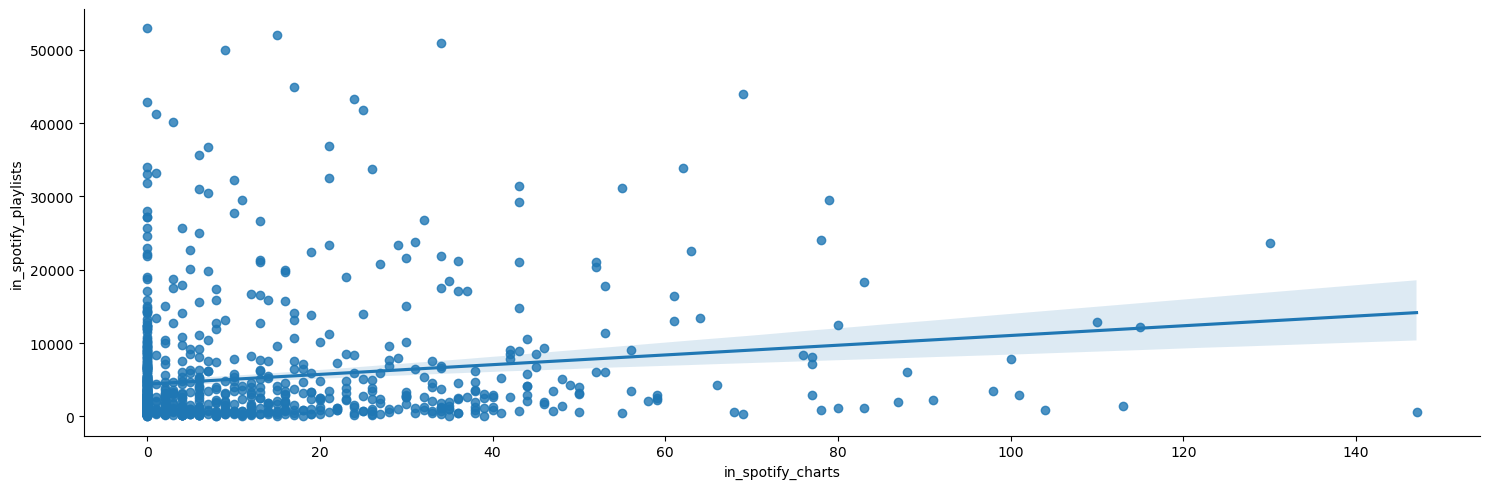

In [31]:
sns.lmplot(
    data=raw_data,
    x='in_spotify_charts',
    y='in_spotify_playlists',
    aspect=3
)

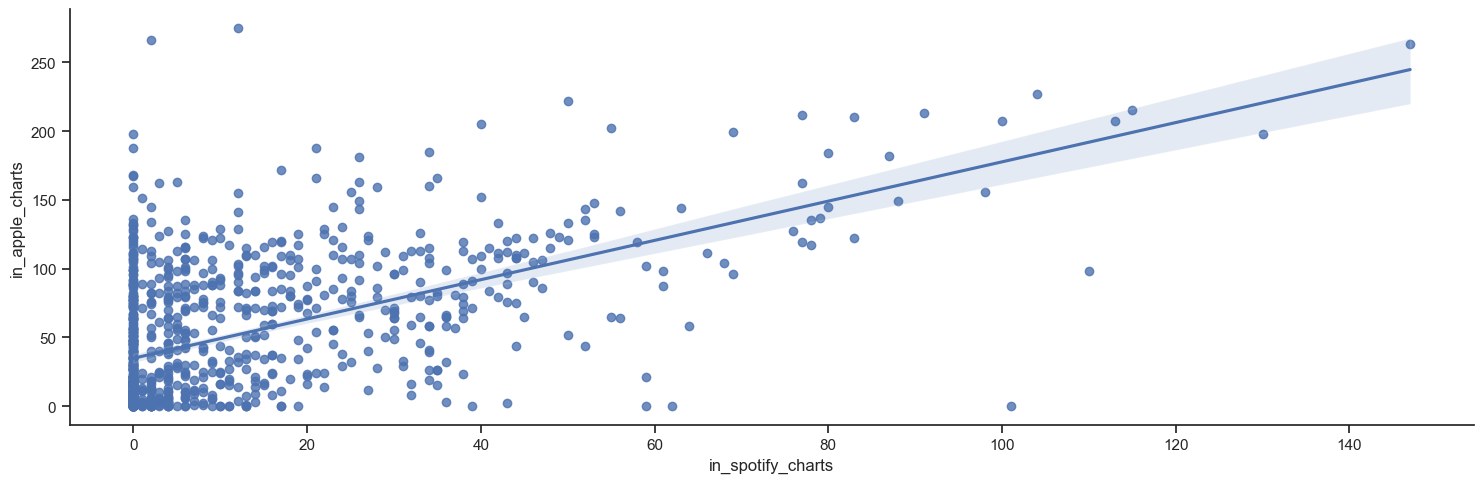

In [39]:
sns.set_theme(style='ticks')
sns.lmplot(
    data=raw_data,
    x='in_spotify_charts',
    y='in_apple_charts',
    aspect=3,
    palette='bright',
    truncate=True,
)